<a href="https://colab.research.google.com/github/GiftyMariya/Arecanut-Disease-/blob/main/Arecanut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D # Corrected layer names
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau #Import callback functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Define the DATA_DIR variable with the correct path
DATA_DIR = "/content/drive/MyDrive/arecanut/Arecanut_dataset/Arecanut_dataset"


#Setting train/test split
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

test_gen_complete_image = test_datagen.flow_from_directory(complete_Image, target_size=(img_height, img_width), class_mode="categorical", batch_size=batch_size, shuffle=False)

Found 2633 images belonging to 9 classes.
Found 1008 images belonging to 9 classes.
Found 2633 images belonging to 9 classes.


In [ ]:
classess=train_gen.num_classes
classess

9

In [ ]:
Test_classess=test_gen.num_classes
classess

9

In [ ]:
MobilenetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for i in MobilenetV2.layers:
  i.trainable = False

In [ ]:
def main_model (tl_model, classess):
  m_model = tl_model.output
  m_model = GlobalAveragePooling2D()(m_model)
  m_model = Dense(1024, activation='relu')(m_model)
  m_model = Dense(1024, activation='relu')(m_model)
  m_model = Dense(512, activation='relu')(m_model)
  m_model = Dense(classess, activation='softmax')(m_model)
  return m_model

In [ ]:
combining_model = main_model(MobilenetV2, classess)

In [ ]:
model = Model (inputs=MobilenetV2.input, outputs=combining_model)

In [ ]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,148,745 (19.64 MB)

 Trainable params: 2,890,761 (11.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint("mobilenetv2_arecanut.keras", monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

callbacks=[model_checkpoint, early_stopping, reduce_lr]

In [ ]:
history= model.fit(train_gen, validation_data=test_gen, epochs=15, callbacks=callbacks)

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9116 - loss: 0.2678
Epoch 1: val_loss improved from inf to 0.14800, saving model to mobilenetv2_arecanut.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 887s 11s/step - accuracy: 0.9118 - loss: 0.2673 - val_accuracy: 0.9563 - val_loss: 0.1480 - learning_rate: 0.0010
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9578 - loss: 0.1423
Epoch 2: val_loss did not improve from 0.14800
83/83 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.9578 - loss: 0.1420 - val_accuracy: 0.9593 - val_loss: 0.1538 - learning_rate: 0.0010
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9654 - loss: 0.1199
Epoch 3: val_loss improved from 0.14800 to 0.14061, saving model to mobilenetv2_arecanut.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.9655 - loss: 0.1196 - val_accuracy: 0.9544 - val_loss: 0.1406 - learning_rate: 0.0010
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9724 - loss: 0.0788
Epoch 4: val_l

In [ ]:
model.save("/content/drive/MyDrive/mobilenetv2_arecanut.keras")

In [ ]:
Test_score= model.evaluate(test_gen)
Test_score

32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9863 - loss: 0.0780


[0.05339858680963516, 0.988095223903656]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import itertools
target_names=[]
for key in train_gen.class_indices:
  target_names.append(key)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize =False, title ='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.

    Normalization can be applied by setting normalize-True.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks (tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        cm= np.around(cm, decimals=2)
        cm[np.isnan(cm)]= 0.0
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    thresh=cm.max()/2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step
Confusion Matrix
Confusion matrix, without normalization


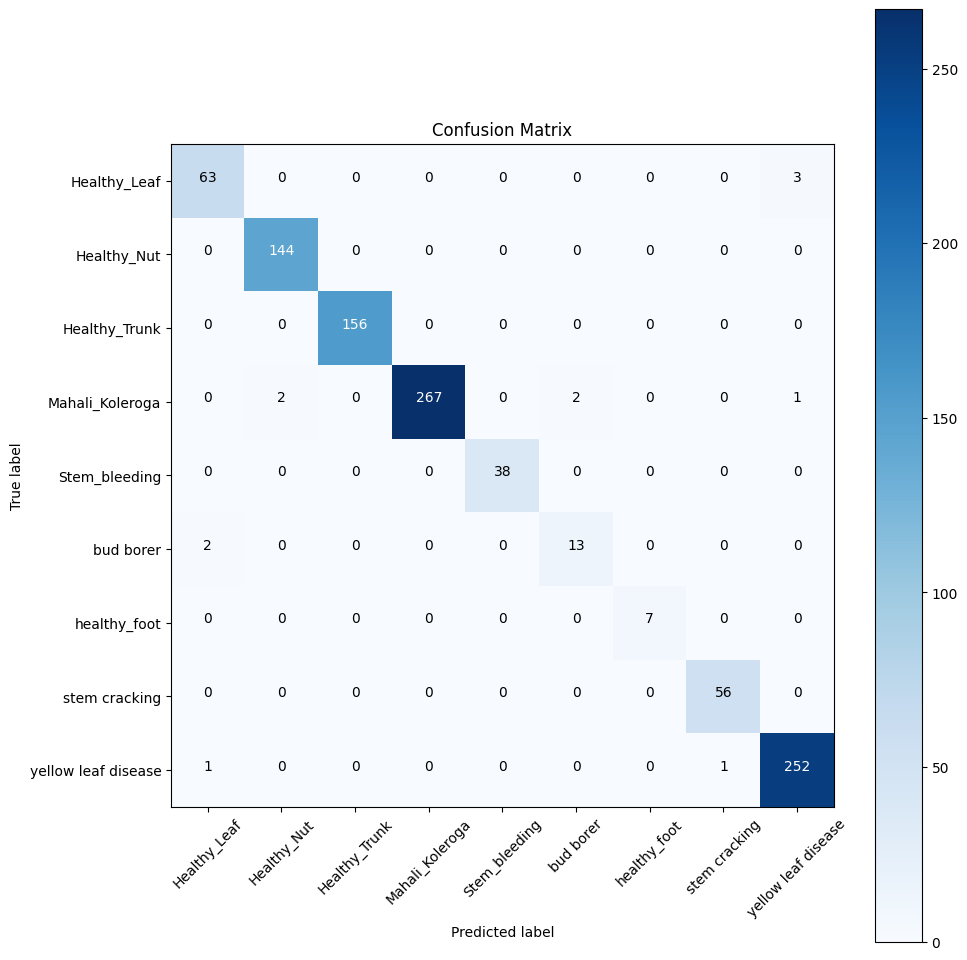

In [ ]:
# Confusion Matrix and classification Report

# 1. Add steps=len(test_gen) so predictions cover ALL images
Y_pred_Model = model.predict(test_gen, steps=len(test_gen))

# 2. Convert probabilities to predicted class indices
Y_pred_Model = np.argmax(Y_pred_Model, axis=-1)

print("Confusion Matrix")

# 3. Compute confusion matrix
from sklearn.metrics import confusion_matrix
CM_Model = confusion_matrix(test_gen.classes, Y_pred_Model)

# 4. Call plotting function with class names
target_names = list(test_gen.class_indices.keys())  #  make sure labels are correct
plot_confusion_matrix(CM_Model, target_names, title="Confusion Matrix")


In [ ]:
print("Classification Report")
print(classification_report(test_gen.classes, Y_pred_Model, target_names=target_names))

Classification Report
                     precision    recall  f1-score   support

       Healthy_Leaf       0.95      0.95      0.95        66
        Healthy_Nut       0.99      1.00      0.99       144
      Healthy_Trunk       1.00      1.00      1.00       156
    Mahali_Koleroga       1.00      0.98      0.99       272
      Stem_bleeding       1.00      1.00      1.00        38
          bud borer       0.87      0.87      0.87        15
       healthy_foot       1.00      1.00      1.00         7
      stem cracking       0.98      1.00      0.99        56
yellow leaf disease       0.98      0.99      0.99       254

           accuracy                           0.99      1008
          macro avg       0.97      0.98      0.98      1008
       weighted avg       0.99      0.99      0.99      1008



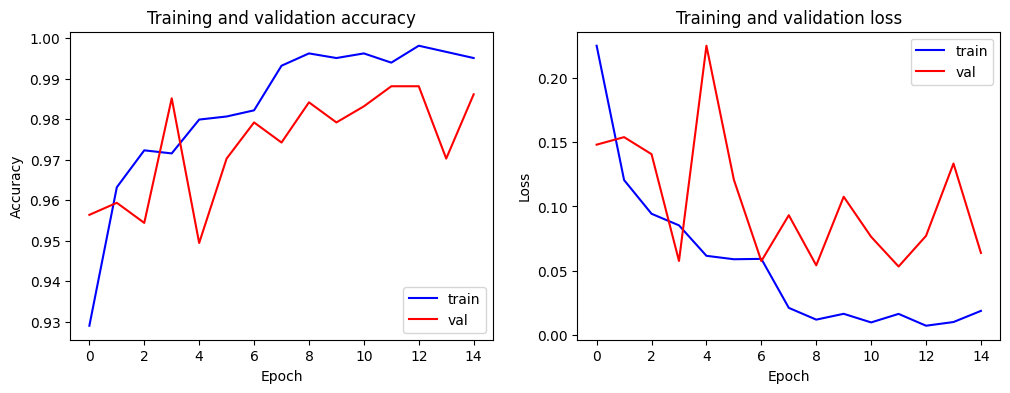

In [ ]:
Train_accuracy=history.history['accuracy']
Val_accuracy=history.history["val_accuracy"]
Train_loss =history.history[ 'loss']
Val_loss= history.history['val_loss']
epochs=range(len(Train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy

plt.subplot(1,2,1)
plt.plot(epochs, Train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, Val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')


# Plotting the loss

plt.subplot(1,2,2)
plt.plot(epochs, Train_loss, 'b', label='Training loss')
plt.plot(epochs, Val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(['train', "val"], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import ast
from tensorflow.keras.preprocessing import image


In [ ]:
labels=train_gen.class_indices
final_labels={v: k for k, v in labels.items()}
final_labels

{0: 'Healthy_Leaf',
 1: 'Healthy_Nut',
 2: 'Healthy_Trunk',
 3: 'Mahali_Koleroga',
 4: 'Stem_bleeding',
 5: 'bud borer',
 6: 'healthy_foot',
 7: 'stem cracking',
 8: 'yellow leaf disease'}

In [ ]:
def predict_image(imgname, from_test_dir):
  test_image = image.load_img(imgname, target_size=(224, 224))
  plt.imshow(test_image)
  plt.show()
  test_image = np.asarray(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  result = model.predict(test_image)
  result_dict = dict()
  for key in list(final_labels.keys()):
    result_dict[final_labels[key]] = result[0][key]
  sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

  if not from_test_dir:
    print('='* 50)
    for label in sorted_results.keys():
      print("{}: {}%".format(label, sorted_results [label]*100))
  final_result = dict()
  final_result[list(sorted_results.keys())[0]] = sorted_results[list(sorted_results.keys())[0]] * 100
  return final_result

In [ ]:
!pip install streamlit pyngrok tensorflow pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.9 MB/s eta 0:00:00


In [ ]:
!ngrok authtoken 3477ge4Kl5UHBiji6DQHHJZiFzp_3vYL317MNddtxCUCdmSML


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load model
MODEL_PATH = "mobilenetv2_arecanut.keras"
model = tf.keras.models.load_model(MODEL_PATH)

# Labels
class_labels = [
    'Healthy_Leaf',
    'Healthy_Nut',
    'Healthy_Trunk',
    'Mahali_Koleroga',
    'Stem_bleeding',
    'bud borer',
    'healthy_foot',
    'stem cracking',
    'yellow leaf disease'
]

# Remedies
remedies = {
     "Healthy_Leaf": "✅ The leaf is healthy. No remedy needed.",
    "Healthy_Nut": "✅ The nut is healthy. No remedy needed.",
    "Healthy_Trunk": "✅ The trunk is healthy. No remedy needed.",
    "Mahali_Koleroga": "Spray Bordeaux mixture (1%) and remove infected parts.",
    "Stem_bleeding": "Scrape affected area, apply coal tar + fungicide paste.",
    "bud borer": "Spray insecticides (e.g., Malathion 0.1%) and destroy affected nuts.",
    "healthy_foot": "✅ The root/foot region is healthy. No remedy needed.",
    "stem cracking": "Apply fungicide paste on cracks and improve soil nutrition.",
    "yellow leaf disease": "Improve drainage, apply fertilizers, and manage nematodes."
}

st.title("🌴 Arecanut Disease Detection")
st.write("Upload an arecanut leaf/plant image to detect disease and get remedy suggestions.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    file_path = "temp.jpg"
    with open(file_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])
    predicted_class = class_labels[class_idx]

    st.image(file_path, caption="Uploaded Image", use_column_width=True)
    st.subheader(f"🩺 Predicted Disease: **{predicted_class}**")
    st.info(f"💡 Suggested Remedy: {remedies[predicted_class]}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
import subprocess

# Kill previous runs
!pkill streamlit

# Start streamlit on port 8501
public_url = ngrok.connect(8501)
print("🌍 Public URL:", public_url)

# Run Streamlit app
subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])



🌍 Public URL: NgrokTunnel: "https://2b0c1207286e.ngrok-free.app" -> "http://localhost:8501"


<Popen: returncode: None args: ['streamlit', 'run', 'app.py', '--server.port...>